In [1]:
# Cargar funciones de la librería de python data analysis
import pandas as pd 
import numpy as np

# Leer csv con datos y cargar en el dataframe data
data = pd.read_csv("data/songDbclean.csv", sep=';', nrows=80000)
# Muestra de las primeras filas del dataset
data.head()

,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Type,ID,Uri,Ref_Track,URL_features,Duration_ms,time_signature,Genre
0,YuveYuveYu,0.624,0.857,10,-6.250,0,0.0542,0.020800,0.206000,0.110,0.324,131.926,audio_features,6J2VvzKwWc2f0JP5RQVZjq,spotify:track:6J2VvzKwWc2f0JP5RQVZjq,https://api.spotify.com/v1/tracks/6J2VvzKwWc2f...,https://api.spotify.com/v1/audio-analysis/6J2V...,282920,4,celticmetal
1,Gloryhammer,0.517,0.916,0,-4.933,1,0.0559,0.000182,0.001910,0.306,0.444,135.996,audio_features,4HA34COgxgVJ6zK88UN4Ik,spotify:track:4HA34COgxgVJ6zK88UN4Ik,https://api.spotify.com/v1/tracks/4HA34COgxgVJ...,https://api.spotify.com/v1/audio-analysis/4HA3...,300320,4,celticmetal
2,Nostos,0.251,0.894,8,-4.103,0,0.0570,0.014400,0.000000,0.123,0.297,114.223,audio_features,3W6Xik6Xxf06JuUoZSATlD,spotify:track:3W6Xik6Xxf06JuUoZSATlD,https://api.spotify.com/v1/tracks/3W6Xik6Xxf06...,https://api.spotify.com/v1/audio-analysis/3W6X...,175353,4,celticmetal
3,Yggdrasil,0.469,0.743,1,-5.570,0,0.0272,0.002220,0.000111,0.276,0.481,86.953,audio_features,2gGveBaLJQMtJ43X4UL5kH,spotify:track:2gGveBaLJQMtJ43X4UL5kH,https://api.spotify.com/v1/tracks/2gGveBaLJQMt...,https://api.spotify.com/v1/audio-analysis/2gGv...,272292,4,celticmetal
4,Incense&Iron,0.487,0.952,1,-4.429,0,0.0613,0.000228,0.000000,0.161,0.329,125.993,audio_features,1lRF81A1C9QoCgBcEop2zg,spotify:track:1lRF81A1C9QoCgBcEop2zg,https://api.spotify.com/v1/tracks/1lRF81A1C9Qo...,https://api.spotify.com/v1/audio-analysis/1lRF...,237933,4,celticmetal


In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn import preprocessing

# Definicion de las columnas que seran utilizadas para formar los cluster de entre todas
# las columnas del dataset
columns = ['Danceability','Energy','Key','Loudness','Mode','Speechness','Acousticness',
           'Instrumentalness','Liveness','Valence','Tempo','Duration_ms','time_signature']
data = data[columns]

# Normalizacion a [0-1]
min_max_scaler = preprocessing.MinMaxScaler()
xNorm = pd.DataFrame(min_max_scaler.fit_transform(data.values))
# Muestra de las primeras filas del dataframe normalizado
xNorm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.631579,0.856984,0.909091,0.795964,0.0,0.056108,0.020884,0.206413,0.110,0.325301,0.550977,0.055961,0.8
1,0.523279,0.915991,0.000000,0.820735,1.0,0.057867,0.000183,0.001914,0.306,0.445783,0.567975,0.059447,0.8
2,0.254049,0.893988,0.727273,0.836346,0.0,0.059006,0.014458,0.000000,0.123,0.298193,0.477042,0.034412,0.8
3,0.474696,0.742971,0.090909,0.808754,0.0,0.028157,0.002229,0.000111,0.276,0.482932,0.363152,0.053832,0.8
4,0.492915,0.951995,0.090909,0.830214,0.0,0.063458,0.000229,0.000000,0.161,0.330321,0.526199,0.046949,0.8


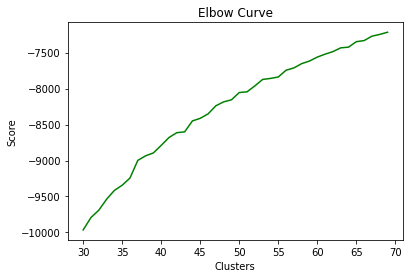

In [22]:
# Ejecucion del calculo de la curva de elbow para definir
# el numero optimo de clusters
nc = range(1, 50)
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(xNorm).score(xNorm) for i in range(len(kmeans))]

# Muestra de la curva calculada
plt.plot(nc, score, color='green') 
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
# El numero que seleccionamos fue 20 basandonos en esta curva

In [9]:
# Calculo de numero optimo de iteraciones basado en la variacion del score
# Prueba uno con 10 iters
kmeans = KMeans(n_clusters=20, max_iter=10, random_state=1)
kmeans.fit(xNorm)
n_inter = [10]
score = [kmeans.score(xNorm)]

# Prueba uno con 20 iters
kmeans = KMeans(n_clusters=20, max_iter=20, random_state=1)
kmeans.fit(xNorm)
n_inter.append(20)
score.append(kmeans.score(xNorm))

# Prueba uno con 30 iters
kmeans = KMeans(n_clusters=20, max_iter=30, random_state=1)
kmeans.fit(xNorm)
n_inter.append(30)
score.append(kmeans.score(xNorm))

# Prueba uno con 50 iters
kmeans = KMeans(n_clusters=20, max_iter=50, random_state=1)
kmeans.fit(xNorm)
n_inter.append(50)
score.append(kmeans.score(xNorm))

# Prueba uno con 100 iters
kmeans = KMeans(n_clusters=20, max_iter=100, random_state=1)
kmeans.fit(xNorm)
n_inter.append(100)
score.append(kmeans.score(xNorm))

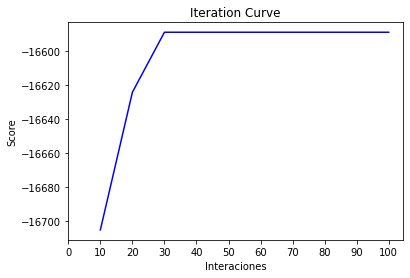

In [13]:
# Muestra de los score de los numeros iteraciones
plt.plot(n_inter, score, color='blue')
plt.xlabel('Interaciones')
plt.ylabel('Score')
plt.title('Iteration Curve')
plt.xticks(np.arange(0, 101, 10))
plt.show()

In [3]:
# Ehecucion final con el numero de clusters e iteraciones seleccionados
kmeans = KMeans(n_clusters=20, max_iter=30, random_state=1)
kmeans.fit(xNorm)

clusters = pd.DataFrame(min_max_scaler.inverse_transform(kmeans.cluster_centers_), columns=columns)
clusters['Key'] = clusters['Key'].round()
clusters['Mode'] = clusters['Mode'].round()
clusters['Duration_ms'] = clusters['Duration_ms'].round()
clusters['time_signature'] = clusters['time_signature'].round()

clusters.to_excel(r'~/music-clustering/data/music-clusters.xlsx', index = False)
# En la siguiente tabla se pueden observar los valores de los centroides
# de los clusters resultantes
clusters

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature
0,0.572578,0.746600,1.0,-6.540850,1.0,0.088768,0.113882,0.030415,0.206424,0.530428,124.443273,235444.0,4.0
1,0.428935,0.293732,6.0,-16.560330,-0.0,0.062477,0.803709,0.843911,0.140937,0.264201,110.695953,270538.0,4.0
2,0.555014,0.414404,6.0,-11.204060,-0.0,0.129703,0.717565,0.033178,0.190283,0.437303,114.088714,252426.0,4.0
3,0.573708,0.731517,7.0,-8.603484,0.0,0.072499,0.073506,0.792579,0.189185,0.347533,126.842226,337985.0,4.0
4,0.532603,0.395893,5.0,-11.057911,1.0,0.085693,0.726874,0.028081,0.194822,0.448427,115.970426,239439.0,4.0
5,0.587137,0.751719,3.0,-6.361100,0.0,0.093432,0.107869,0.038466,0.203491,0.506166,122.822306,240525.0,4.0
6,0.625802,0.748248,9.0,-6.493941,0.0,0.104887,0.119668,0.032646,0.195072,0.564925,121.556818,238109.0,4.0
7,0.572077,0.749595,8.0,-6.556418,1.0,0.087209,0.119921,0.030039,0.204288,0.544932,123.732419,235861.0,4.0
8,0.550721,0.743621,5.0,-8.425138,1.0,0.071902,0.064061,0.787437,0.188179,0.340940,127.230647,327510.0,4.0
9,0.446744,0.295733,5.0,-16.396953,1.0,0.058291,0.825910,0.848673,0.141761,0.358600,112.538442,236665.0,4.0
